# Download Citibike stations

In [1]:
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from os.path import join
import os

In [2]:
stations_url = "https://feeds.citibikenyc.com/stations/stations.json"
stations_response = requests.get(stations_url)
stations_json = stations_response.json()

In [3]:
station_ids = []
station_lats = []
station_lons = []
station_names = []
station_test = []
station_docks = []

for i in stations_json['stationBeanList']:
    station_ids.append(i['id'])
    station_lats.append(i['latitude'])
    station_lons.append(i['longitude'])
    station_names.append(i['stationName'])
    station_test.append(i['testStation'])
    station_docks.append(i['totalDocks'])
    
stations = pd.DataFrame()
stations['id'] = station_ids
stations['latitude'] = station_lats
stations['longitude'] = station_lons
stations['name'] = station_names
stations['test'] = station_test
stations['docks'] = station_docks

stations.sort_values(by='id', inplace=True)
stations.index=stations['id']

# Add spatial reference to dataframe
geometry = [Point(xy) for xy in zip(stations.longitude, stations.latitude)]
stations = stations.drop(['longitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
stations = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)

In [4]:
stations.head()

,id,name,test,docks,geometry
id,,,,,
72,72,W 52 St & 11 Ave,False,39,POINT (-73.99392888 40.76727216)
79,79,Franklin St & W Broadway,False,33,POINT (-74.00666661 40.71911552)
82,82,St James Pl & Pearl St,False,27,POINT (-74.00016545 40.71117416)
83,83,Atlantic Ave & Fort Greene Pl,False,62,POINT (-73.97632328 40.68382604)
119,119,Park Ave & St Edwards St,False,19,POINT (-73.97803415 40.69608941)


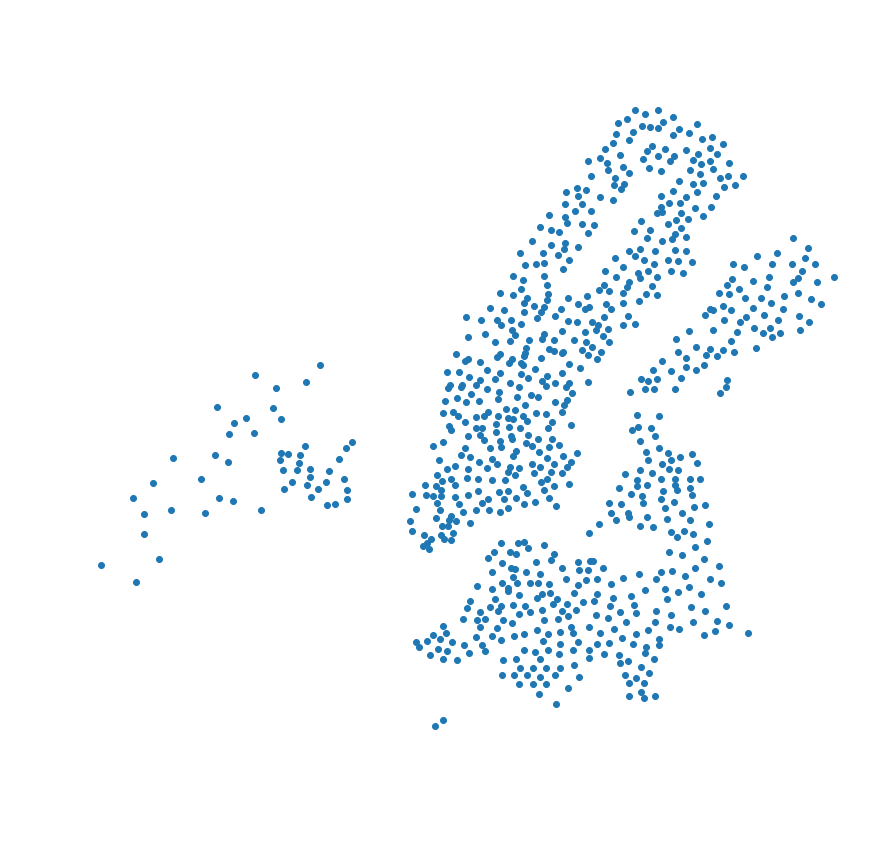

Citibike Stations


In [5]:
f, ax = plt.subplots(1, figsize=(15,15))
stations.plot(ax=ax, )
ax.set_axis_off()
plt.axis('equal')
plt.show()
print("Citibike Stations")

In [6]:
# https://github.com/geopandas/geopandas/issues/437

def gdf_bool_to_int(gdf):
    """For a given GeoDataFrame, returns a copy that
    recasts all `bool`-type columns as `int`.

    GeoDataFrame -> GeoDataFrame"""
    df = gdf.copy()
    coltypes = gpd.io.file.infer_schema(df)['properties']
    for c in coltypes.items():
        if c[1] == 'bool':
            colname = c[0]
            df[colname] = df[colname].astype('int')
    return df

In [7]:
stations = gdf_bool_to_int(stations)

In [8]:
root = ".."

output_dir = join(root, "data", "citibike_stations")

# Make data directory
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

stations.to_file(output_dir)